In [1]:
%matplotlib inline
from __future__ import division
from scipy import signal as sg
from scipy.io import wavfile
import glob
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wavs_folder = '/mnt/cube/earneodo/decoding/other_birds'

def resample_wav(wave_in, in_sf, out_sf):
    if int(in_sf) == int(out_sf):
        wave_out = wave_in
    else:
        new_len = int(round(wave_in.shape[0] * out_sf / in_sf))
        wave_out = sg.resample(wave_in, new_len)
    return wave_out

def load_all_wavs(folder, s_f=None):
    f_list = glob.glob(os.path.join(wavs_folder, '*.wav'))
    all_wavs = []
    #logger.info('loading waves')
    for f in tqdm(f_list, total=len(f_list)):
        try:
            one_wav = wavfile.read(f)
            if s_f:
                x = resample_wav(one_wav[1].astype(np.float), one_wav[0], s_f)
            else:
                x = one_wav[1].astype(np.float)
                s_f = one_wav[0]
            all_wavs.append( (os.path.split(f)[1].split('.')[0], s_f, x))
        except:
            print('Bad file {}'.format(f))
        
    return pd.DataFrame(all_wavs, columns=['m_id', 's_f', 'x'])

aw = load_all_wavs(wavs_folder, s_f=30000)

aw.to_pickle(os.path.join('/mnt/cube/earneodo/bci_zf/stim_data/z_000', 'more_bird_mot_30khz.pickle'))


  0%|          | 0/86 [00:00<?, ?it/s]

Bad file /mnt/cube/earneodo/decoding/other_birds/WH62.wav


 26%|██▌       | 22/86 [03:42<03:44,  3.51s/it] 

Bad file /mnt/cube/earneodo/decoding/other_birds/WH-DG DG825.wav


 44%|████▍     | 38/86 [03:56<01:22,  1.72s/it]

Bad file /mnt/cube/earneodo/decoding/other_birds/WH27 LG147.wav


 63%|██████▎   | 54/86 [04:25<02:09,  4.05s/it]

Bad file /mnt/cube/earneodo/decoding/other_birds/Y46 DB837.wav


 79%|███████▉  | 68/86 [07:10<11:47, 39.32s/it]

Bad file /mnt/cube/earneodo/decoding/other_birds/WH-R PK967.wav


100%|██████████| 86/86 [08:59<00:00,  6.28s/it]


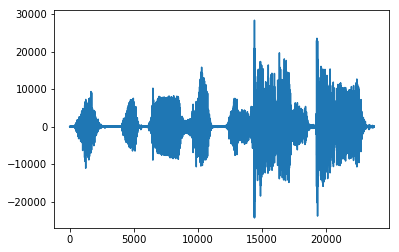

In [3]:
x = aw.x.tolist()[40]
plt.plot(x)

In [4]:
aw.head()

,m_id,s_f,x
0,z029,30000,"[-1125.5540432133887, 222.1629593874052, -296...."
1,PK111 PK112,30000,"[127.0617696650341, -65.56386581314155, 87.800..."
2,z052,30000,"[-34.173258502382666, -17.277507849836343, -7...."
3,R-LG PK192,30000,"[93.563273774888, 197.9805349979143, 155.99816..."
4,LG69,30000,"[-63.254691180509504, -38.552025731351094, -39..."


In [5]:
import pickle
pickle.dump(aw, open(os.path.join('/mnt/cube/earneodo/bci_zf/stim_data/z_000', 
                          'all_bird_mot_30khz.pickle.v2'), 'wb'), protocol=2)


In [ ]:
pickle.dump(w, open("a_py2.pkl","wb"), protocol=2)
